# EDA tomás

---

In [94]:
### Load necessary modules -------------------------------
# interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
from sklearn.model_selection import train_test_split

---

## 1. Preparing the Dataset

### STEP 1: IMPORT DATASET

In [95]:
### Load file --------------------------------------------
df_IRRAD = pd.read_csv('data/G04A_DATOS_IRRAD.csv', sep = ",")
df_IRRAD.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.47,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.66,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.12,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.50,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.16,0.0,0.0,2015,1,5,0


In [96]:
### Load file --------------------------------------------
df_UTIL = pd.read_csv('data/G04A_DATOS_UTIL.csv', sep = ",")
df_UTIL.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.000023,0.000008,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.000012,0.000004,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.000008,0.000000,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.000008,0.000000,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.000008,0.000008,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0


Unimos todo en un mismo dataframe


In [97]:
df_aux = pd.merge(df_IRRAD, df_UTIL, on='FECHA')

In [98]:
df_aux

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO_x,...,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO_y,MES_y,DIA_y,DIASEM_y
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.470,0.0,0.0,2015,...,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.660,0.0,0.0,2015,...,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.120,0.0,0.0,2015,...,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.500,0.0,0.0,2015,...,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.160,0.0,0.0,2015,...,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.0,0.0,0.0,176437.95,596362.94,213554.200,0.0,0.0,2020,...,0.012102,0.068252,0.070849,0.012841,0.000003,0.000003,2020,12,27,6
2188,2020-12-28,0.0,0.0,0.0,573497.50,1097877.50,269206.560,0.0,0.0,2020,...,0.032334,0.334919,0.285503,0.046018,0.000003,0.000007,2020,12,28,0
2189,2020-12-29,0.0,0.0,0.0,425860.56,801252.40,237152.560,0.0,0.0,2020,...,0.023633,0.245105,0.282372,0.017419,0.000007,0.000007,2020,12,29,1
2190,2020-12-30,0.0,0.0,0.0,214860.45,321715.56,29951.986,0.0,0.0,2020,...,0.010654,0.134742,0.076885,0.005577,0.000010,0.000000,2020,12,30,2


Realizamos el melt 

In [99]:
import pandas as pd

# Asumimos que df es tu DataFrame

# Lista de identificadores comunes
id_vars = ['FECHA', 'ANNO_x', 'MES_x', 'DIA_x', 'DIASEM_x']

# Melt para irradiancia
irrad_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21'], var_name='HOUR', value_name='IRRAD_VALUE')

# Melt para utilidad
util_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21'], var_name='HOUR', value_name='UTIL_VALUE')

# Ajustar las columnas 'HOUR' para que coincidan y permitan un merge adecuado
irrad_melt['HOUR'] = irrad_melt['HOUR'].str.extract('(\d+)')
util_melt['HOUR'] = util_melt['HOUR'].str.extract('(\d+)')

# Realizar un merge de los DataFrames basado en las columnas comunes, incluida la 'HOUR'
df = pd.merge(irrad_melt, util_melt, on=id_vars + ['HOUR'])



In [100]:
df

,FECHA,ANNO_x,MES_x,DIA_x,DIASEM_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01,2015,1,1,3,00,0.0,0.000023
1,2015-01-02,2015,1,2,4,00,0.0,0.000012
2,2015-01-03,2015,1,3,5,00,0.0,0.000008
3,2015-01-04,2015,1,4,6,00,0.0,0.000008
4,2015-01-05,2015,1,5,0,00,0.0,0.000008
...,...,...,...,...,...,...,...,...
17531,2020-12-27,2020,12,27,6,21,0.0,0.000003
17532,2020-12-28,2020,12,28,0,21,0.0,0.000007
17533,2020-12-29,2020,12,29,1,21,0.0,0.000007
17534,2020-12-30,2020,12,30,2,21,0.0,0.000000


Comprobamos si hay periodicidad anual

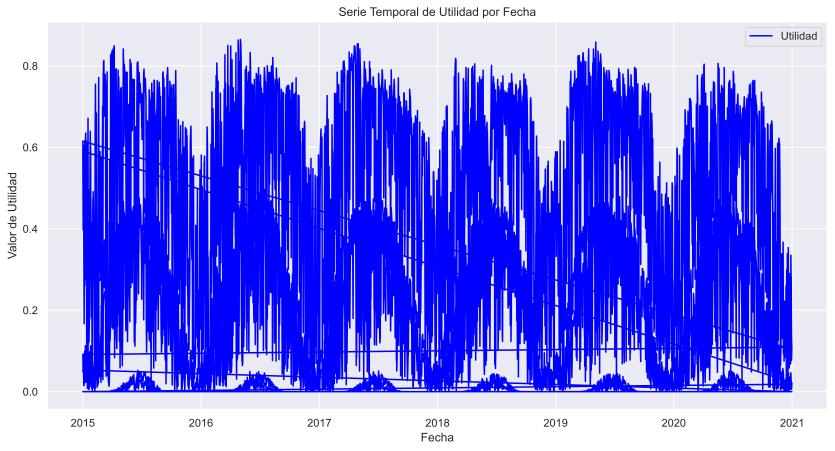

In [101]:
# Asegurarte de que la columna 'FECHA' es de tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Establecer la columna 'FECHA' como el índice del DataFrame
df.set_index('FECHA', inplace=True)

# Graficar la columna 'UTIL_VALUE' como una serie temporal
plt.figure(figsize=(14, 7))  # Ajusta el tamaño de la figura a tu preferencia
plt.plot(df.index, df['UTIL_VALUE'], label='Utilidad', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Valor de Utilidad')
plt.title('Serie Temporal de Utilidad por Fecha')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Se puede visualizar como la variable fecha, tiene una periodicidad por año, por tanto borramos esta variable

In [102]:
df.reset_index(drop=False, inplace=True)
df

,FECHA,ANNO_x,MES_x,DIA_x,DIASEM_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01,2015,1,1,3,00,0.0,0.000023
1,2015-01-02,2015,1,2,4,00,0.0,0.000012
2,2015-01-03,2015,1,3,5,00,0.0,0.000008
3,2015-01-04,2015,1,4,6,00,0.0,0.000008
4,2015-01-05,2015,1,5,0,00,0.0,0.000008
...,...,...,...,...,...,...,...,...
17531,2020-12-27,2020,12,27,6,21,0.0,0.000003
17532,2020-12-28,2020,12,28,0,21,0.0,0.000007
17533,2020-12-29,2020,12,29,1,21,0.0,0.000007
17534,2020-12-30,2020,12,30,2,21,0.0,0.000000


In [103]:
df = df.drop(['DIASEM_x'], axis=1)

In [104]:
df

,FECHA,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01,2015,1,1,00,0.0,0.000023
1,2015-01-02,2015,1,2,00,0.0,0.000012
2,2015-01-03,2015,1,3,00,0.0,0.000008
3,2015-01-04,2015,1,4,00,0.0,0.000008
4,2015-01-05,2015,1,5,00,0.0,0.000008
...,...,...,...,...,...,...,...
17531,2020-12-27,2020,12,27,21,0.0,0.000003
17532,2020-12-28,2020,12,28,21,0.0,0.000007
17533,2020-12-29,2020,12,29,21,0.0,0.000007
17534,2020-12-30,2020,12,30,21,0.0,0.000000


In [105]:

df['FECHA'] = pd.to_datetime(df['FECHA'])

# Crea la nueva columna 'dia_mes' extrayendo el día del año
df['dia_mes'] = df['FECHA'].dt.dayofyear

print(df)


           FECHA  ANNO_x  MES_x  DIA_x HOUR  IRRAD_VALUE  UTIL_VALUE  dia_mes
0     2015-01-01    2015      1      1   00          0.0    0.000023        1
1     2015-01-02    2015      1      2   00          0.0    0.000012        2
2     2015-01-03    2015      1      3   00          0.0    0.000008        3
3     2015-01-04    2015      1      4   00          0.0    0.000008        4
4     2015-01-05    2015      1      5   00          0.0    0.000008        5
...          ...     ...    ...    ...  ...          ...         ...      ...
17531 2020-12-27    2020     12     27   21          0.0    0.000003      362
17532 2020-12-28    2020     12     28   21          0.0    0.000007      363
17533 2020-12-29    2020     12     29   21          0.0    0.000007      364
17534 2020-12-30    2020     12     30   21          0.0    0.000000      365
17535 2020-12-31    2020     12     31   21          0.0    0.000010      366

[17536 rows x 8 columns]


In [106]:
df = df.drop(['FECHA'], axis=1)
df

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,00,0.0,0.000023,1
1,2015,1,2,00,0.0,0.000012,2
2,2015,1,3,00,0.0,0.000008,3
3,2015,1,4,00,0.0,0.000008,4
4,2015,1,5,00,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


In [107]:
df 

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,00,0.0,0.000023,1
1,2015,1,2,00,0.0,0.000012,2
2,2015,1,3,00,0.0,0.000008,3
3,2015,1,4,00,0.0,0.000008,4
4,2015,1,5,00,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


In [108]:
df.to_excel("prueba_2.xlsx", index=False, engine='openpyxl')

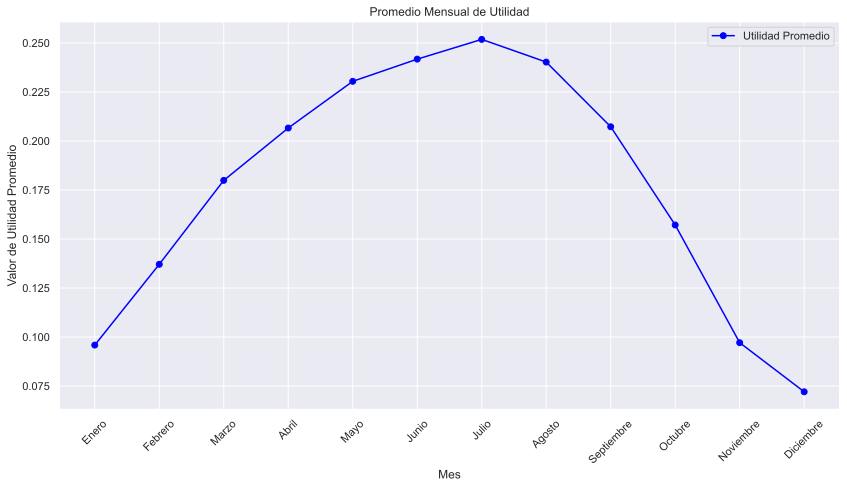

In [18]:


# Agrupar los datos por 'MES_x' y calcular el promedio de 'UTIL_VALUE' para cada mes
monthly_avg = df.groupby('MES_x')['UTIL_VALUE'].mean()

# Graficar el resultado
plt.figure(figsize=(14, 7))  # Ajusta el tamaño de la figura a tu preferencia
plt.plot(monthly_avg.index, monthly_avg.values, label='Utilidad Promedio', color='blue', marker='o')
plt.xlabel('Mes')
plt.ylabel('Valor de Utilidad Promedio')
plt.title('Promedio Mensual de Utilidad')
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [22]:
# Exportar el DataFrame a un archivo Excel
df.to_excel("prueba_2.xlsx", index=False, engine='openpyxl')

### STEP 2: CHECK OUT THE MISSING VALUES

In [16]:
### Info and type of variables & missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17536 non-null  datetime64[ns]
 1   MES_x        17536 non-null  int64         
 2   DIASEM_x     17536 non-null  int64         
 3   HOUR         17536 non-null  object        
 4   IRRAD_VALUE  17536 non-null  float64       
 5   UTIL_VALUE   17536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 822.1+ KB


In [41]:
### Basic removal of missing values
df.dropna(inplace=True,) #Inplace for "really" elminiating the rows in the dataframe
#Check "axis" or "subset" arguments for additional options

#Check results
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17536 entries, 2015-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MES_x        17536 non-null  int64  
 1   DIASEM_x     17536 non-null  int64  
 2   HOUR         17536 non-null  object 
 3   IRRAD_VALUE  17536 non-null  float64
 4   UTIL_VALUE   17536 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 822.0+ KB


### STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [42]:
# Data types
df.describe()

,MES_x,DIASEM_x,IRRAD_VALUE,UTIL_VALUE
count,17536.000000,17536.000000,1.753600e+04,17536.000000
mean,6.521898,3.000000,5.132890e+05,0.176620
std,3.449085,1.999601,7.695626e+05,0.244970
min,1.000000,0.000000,0.000000e+00,-0.000169
25%,4.000000,1.000000,0.000000e+00,0.000008
50%,7.000000,3.000000,0.000000e+00,0.019769
75%,10.000000,5.000000,8.401422e+05,0.325520
max,12.000000,6.000000,2.927716e+06,0.864839


<Figure size 8000x6400 with 0 Axes>

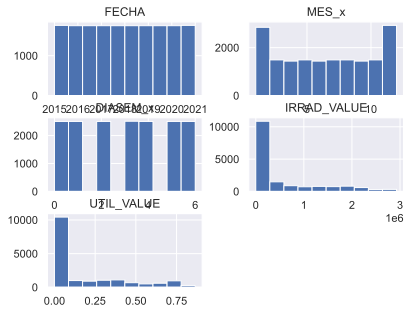

In [49]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame y ya está definido en el contexto

# Ajustar el tamaño de la figura para los histogramas
plt.figure(figsize=(80, 64))  # Ajusta estas dimensiones según necesites

# Dibujar los histogramas para todas las columnas numéricas del DataFrame
df.hist()

# Mostrar los histogramas
plt.show()


### STEP 4: ENCODE CATEGORICAL VARIABLES

In [38]:
#There are no categorical input variables

### Convert output variable to factor
df.Y = df.Y.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      999 non-null    float64 
 1   X2      999 non-null    float64 
 2   Y       999 non-null    category
dtypes: category(1), float64(2)
memory usage: 24.5 KB


### STEP 5: EXPLORATORY ANALYSIS
Correlation plot of numeric variables

In [50]:
### Exploratory analysis -------------------------------------------------------------------------------------
# Scatterplot between two varaibles. Hue --> Color of dots
sns.scatterplot(x = 'X1', y = 'X2', hue = 'Y', data = df).set_title("Whole set")
plt.show()

# Scatterplot all vs all
sns.pairplot(df, hue = 'Y')
plt.show()

ValueError: Could not interpret value `X1` for parameter `x`

In [ ]:
#para 3 variables así:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame que contiene las columnas 'X1', 'X2', 'X3' y 'Y'

# Scatterplot entre X1 y X2 con color codificado por la variable Y
sns.scatterplot(x='X1', y='X2', hue='Ya', data=df).set_title("Whole set")
plt.show()

# Scatterplot entre X1 y X3 con color codificado por la variable Y
sns.scatterplot(x='X1', y='X3', hue='Ya', data=df).set_title("Whole set")
plt.show()

# Scatterplot entre X2 y X3 con color codificado por la variable Y
sns.scatterplot(x='X2', y='X3', hue='Ya', data=df).set_title("Whole set")
plt.show()

# Scatterplot entre todas las variables con color codificado por la variable Y
sns.pairplot(df, hue='Ya')
plt.show()



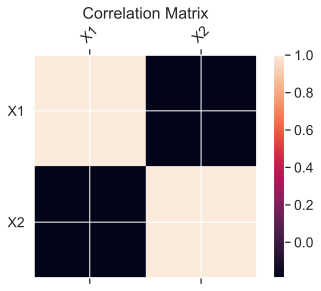

In [40]:
### Exploratory analysis -------------------------------------------------------------------------------------
#correlation plot of numeric variables
f = plt.figure()
plt.matshow(df.select_dtypes(include=['int64','float64']).corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(include=['int64','float64']).shape[1]), df.select_dtypes(include=['int64','float64']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(include=['int64','float64']).shape[1]), df.select_dtypes(include=['int64','float64']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### STEP 6: CHECK OUT FOR CLASS IMBALANCES

In [41]:
# Class count
df['Y'].value_counts()

YES    500
NO     499
Name: Y, dtype: int64

### STEP 7: SPLIT THE DATA INTO TRAINING AND TEST SETS

In [42]:
# Define input and output matrices
INPUTS = ['X1','X2']
OUTPUT = 'Y'
X = df[INPUTS]
y = df[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0, #seed for replication
                                                    stratify = y)   #Preserves distribution of y

In [43]:
X_train.head()

,X1,X2
621,0.161033,-5.407874
313,3.526016,3.725739
56,1.612167,-6.130301
926,6.227158,-3.809534
344,-3.139076,-2.136547


In [44]:
y_train

621    YES
313    YES
56     YES
926    YES
344    YES
      ... 
969    YES
372    YES
123    YES
929     NO
342     NO
Name: Y, Length: 799, dtype: category
Categories (2, object): ['NO', 'YES']

In [45]:
## Create dataset to store model predictions
dfTR_eval = X_train.copy()
dfTR_eval['Y'] = y_train # We will call Y as output variable for simplicity
dfTS_eval = X_test.copy()
dfTS_eval['Y'] = y_test # We will call Y as output variable for simplicity

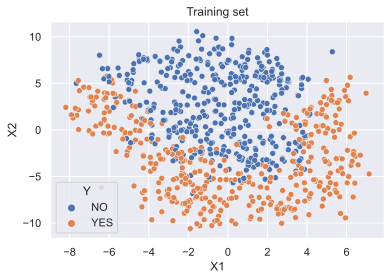

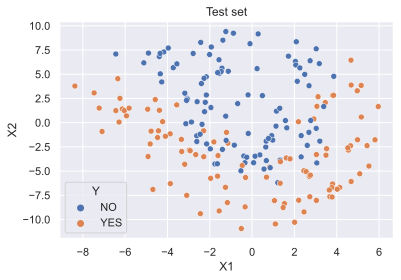

In [46]:
## plot training and test sets. 

palette = {'NO':'C0', 'YES':'C1'} # Needed to maintain color palette 
sns.scatterplot(x = 'X1', y = 'X2', hue = 'Y', data = dfTR_eval, palette=palette).set_title("Training set")
plt.show()

plt.figure() # Needed to plot two separated plots instead of two overlapped
sns.scatterplot(x = 'X1', y = 'X2', hue = 'Y', data = dfTS_eval, palette=palette).set_title("Test set")
plt.show()

## Try changing the value inside random_state attribute of train_test_split(). How does it affect the selected data?